# Adding Dependences

In [1]:
using DelimitedFiles
using Images, FileIO
using Plots

# Extract Matrix From Image

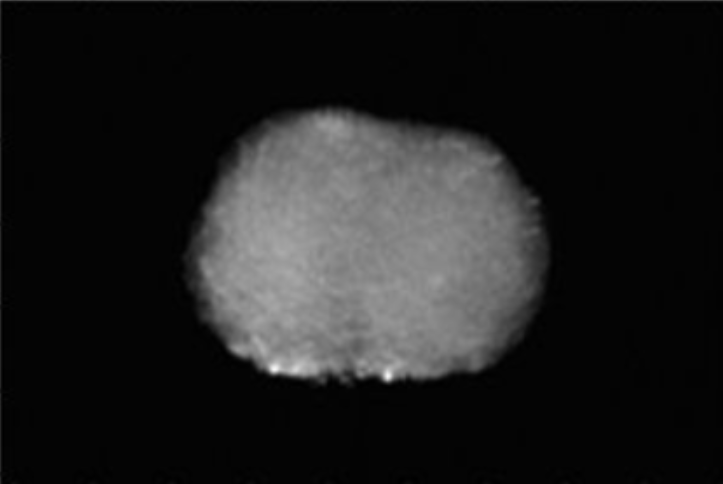

In [2]:
img = load("B.png")

## Extracting the grayscale on the image

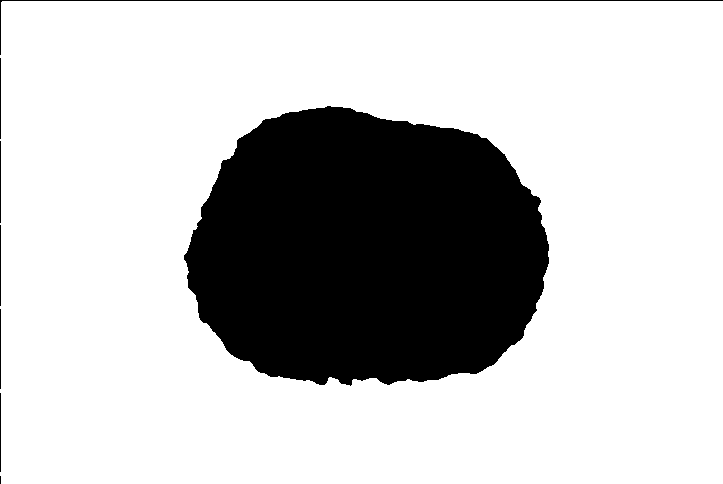

In [3]:
Gray_img = .! (Gray.(img) .> 0.1)
Gray.(Gray_img)

# Extracting the Contour on the image

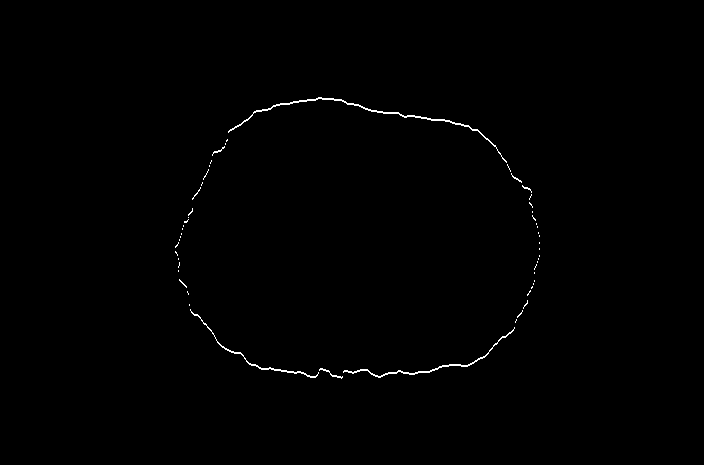

In [4]:
reduce = 10
Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,reduce:size(Gray_img_contour)[2]-reduce]
Gray.(Gray_img_contour)

# Extracting the index of each point

In [5]:
idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

1502×2 Matrix{Int64}:
 176  247
 176  248
 176  252
 176  253
 177  246
 177  247
 177  253
 177  254
 178  245
 178  246
 178  255
 178  256
 179  243
   ⋮  
 539  233
 539  234
 539  259
 539  260
 540  236
 540  237
 540  243
 540  244
 540  249
 540  250
 540  256
 540  257

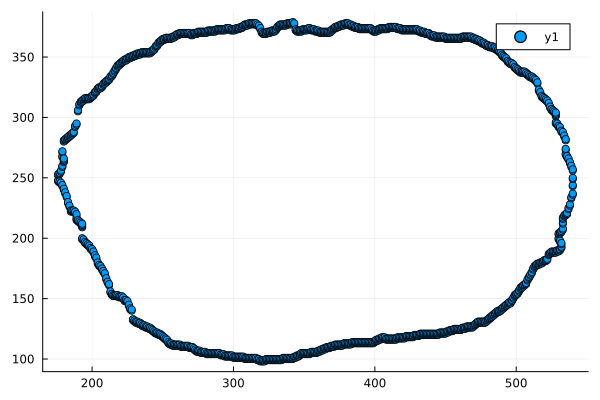

In [6]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

In [7]:
Gray_img

484×723 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1     1 

In [8]:
# In X
sum_x = sum(Gray_img, dims=1) .* collect(1:size(Gray_img,2))'
x_c = sum(sum_x) / sum(Gray_img)

# In Y
sum_y = sum(Gray_img, dims=2) .* collect(1:size(Gray_img,1))
y_c = sum(sum_y) / sum(Gray_img)

center_of_mass = hcat(x_c,y_c)

1×2 Matrix{Float64}:
 360.963  240.667

# Putting the index in the center of mass

In [9]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

1502×2 Matrix{Float64}:
 -184.963   6.33337
 -184.963   7.33337
 -184.963  11.3334
 -184.963  12.3334
 -183.963   5.33337
 -183.963   6.33337
 -183.963  12.3334
 -183.963  13.3334
 -182.963   4.33337
 -182.963   5.33337
 -182.963  14.3334
 -182.963  15.3334
 -181.963   2.33337
    ⋮      
  178.037  -7.66663
  178.037  -6.66663
  178.037  18.3334
  178.037  19.3334
  179.037  -4.66663
  179.037  -3.66663
  179.037   2.33337
  179.037   3.33337
  179.037   8.33337
  179.037   9.33337
  179.037  15.3334
  179.037  16.3334

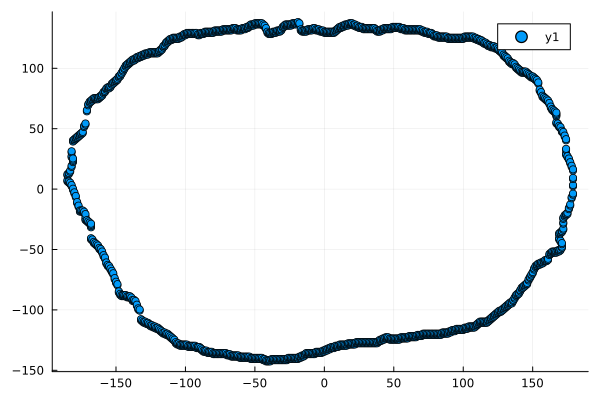

In [10]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [11]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]
center_idx_cil_coord = hcat(θ,r)

1502×2 Matrix{Float64}:
 -0.0342279  185.071
 -0.0396271  185.108
 -0.0611973  185.31
 -0.0665817  185.374
 -0.0289835  184.04
 -0.0344139  184.072
 -0.0669426  184.376
 -0.0723521  184.445
 -0.02368    183.014
 -0.0291418  183.041
 -0.0781807  183.523
 -0.0836106  183.604
 -0.0128226  181.978
  ⋮          
  3.09856    178.202
  3.10416    178.162
  0.102613   178.979
  0.108168   179.084
  3.11553    179.098
  3.12112    179.075
  0.0130321  179.052
  0.0186162  179.068
  0.0465119  179.231
  0.0520838  179.28
  0.085435   179.693
  0.0909771  179.781

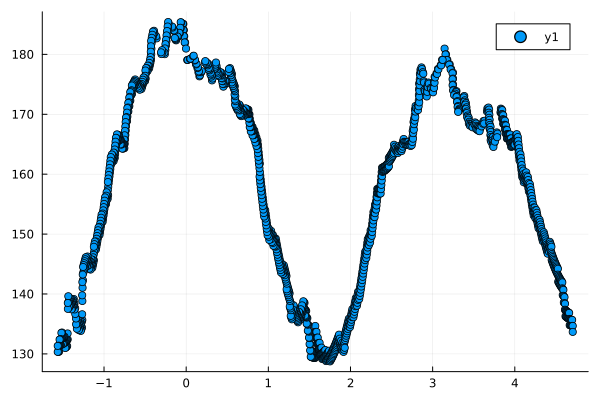

In [12]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)